In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.pandas.set_option('display.max_columns', None)
dataset=pd.read_excel("Bank_Personal_Loan_Modelling.xlsx",sheet_name=1)
dataset.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
dataset.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

## Dropping irrelevant attributes
Whether a certain customer will get the personal loan or not doesn't depends upon his/her ID and ZIP Code, so these columns are dropped from the loaded dataset.

In [6]:
dataset1=dataset.drop(["ID","ZIP Code"],axis=1)
dataset1.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [7]:
dataset1.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


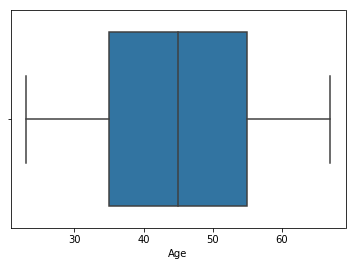

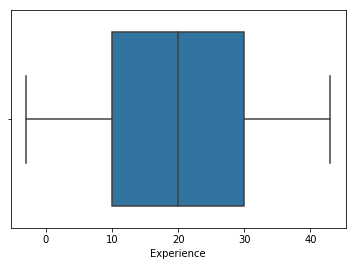

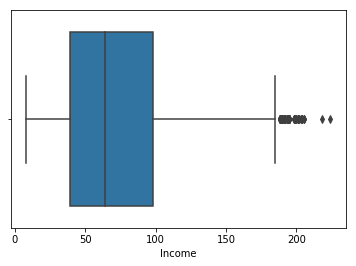

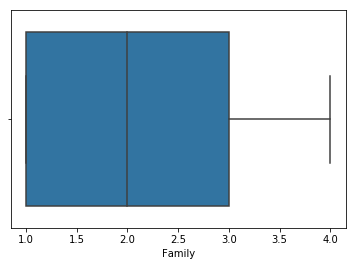

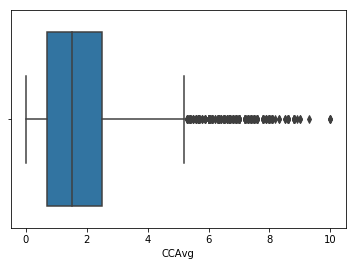

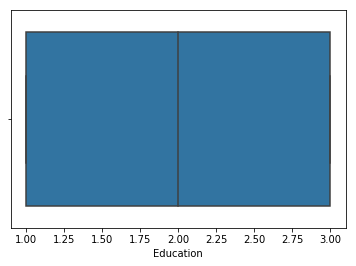

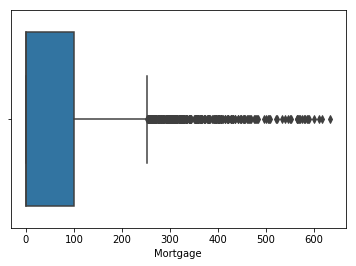

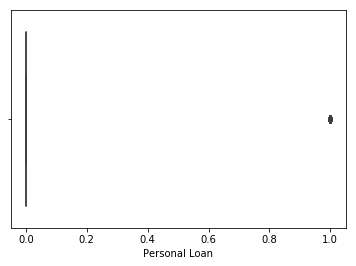

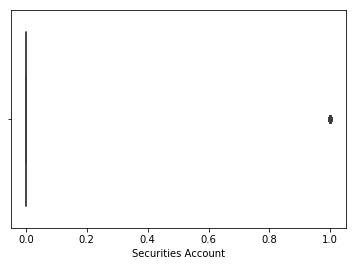

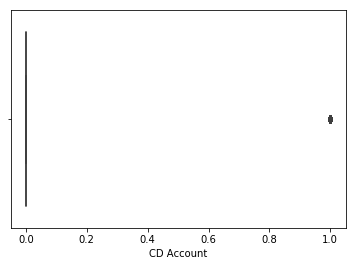

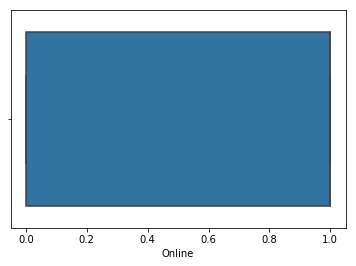

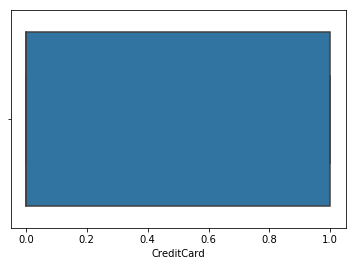

In [8]:
for i in dataset1.columns:
    sns.boxplot(dataset1[i])
    plt.show()

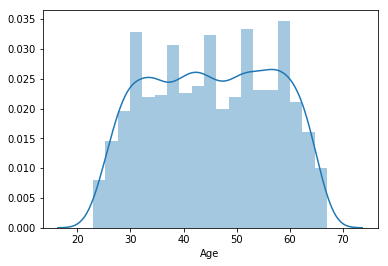

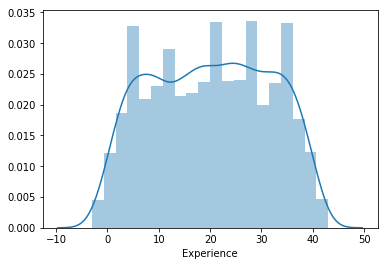

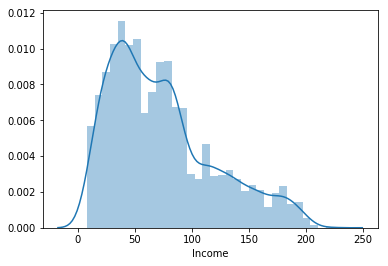

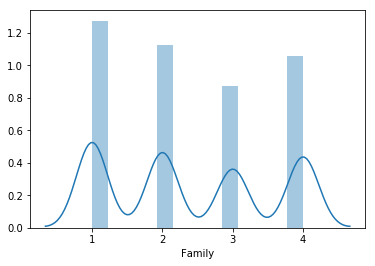

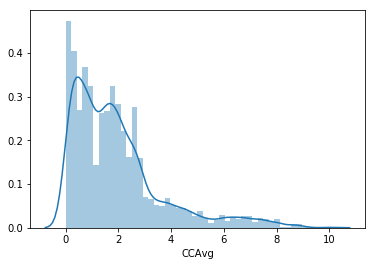

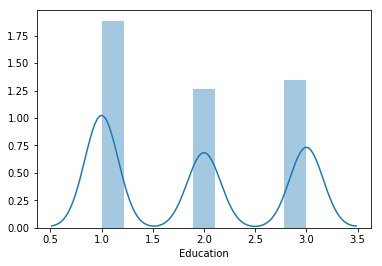

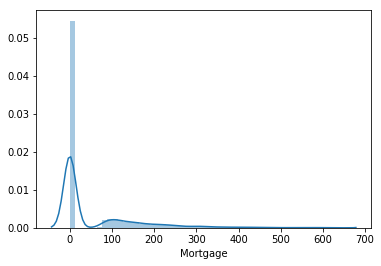

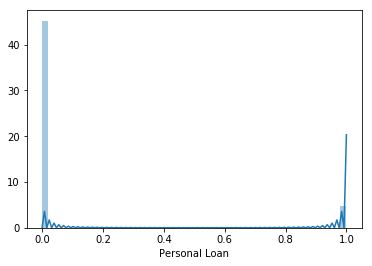

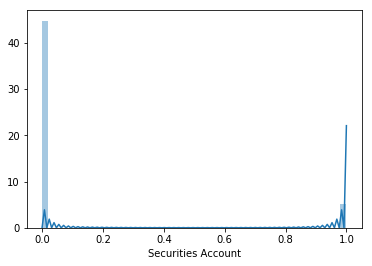

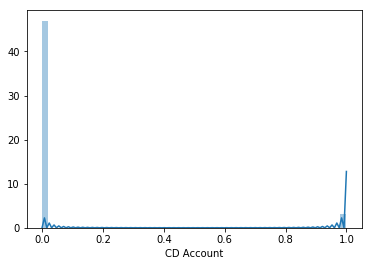

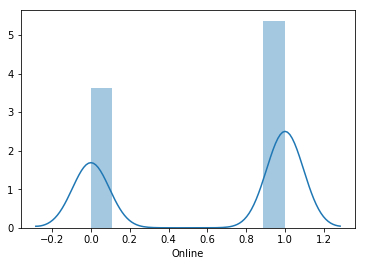

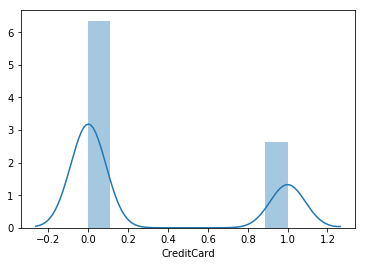

In [10]:
for i in dataset1.columns:
    sns.distplot(dataset1[i])
    plt.show()

## Data visualization inferences
1) The dependent variable Personal loan is a binary categorical variable encoded as 0 or 1.

2) Few independent variables like Education, Securities Account, CD Account, Online CreditCard are categorical in nature and are encoded accordingly.

3) The independent variable Age is multimodal and has no outliers.

4) The independent variable Experience is multimodal and has no outliers.

5) The independent variable Income is multimodal and has few outliers.

6) The independent variable CCAvg is multimodal and has many outliers.

7) The independent variable Mortgage is right skewed and has many outliers.

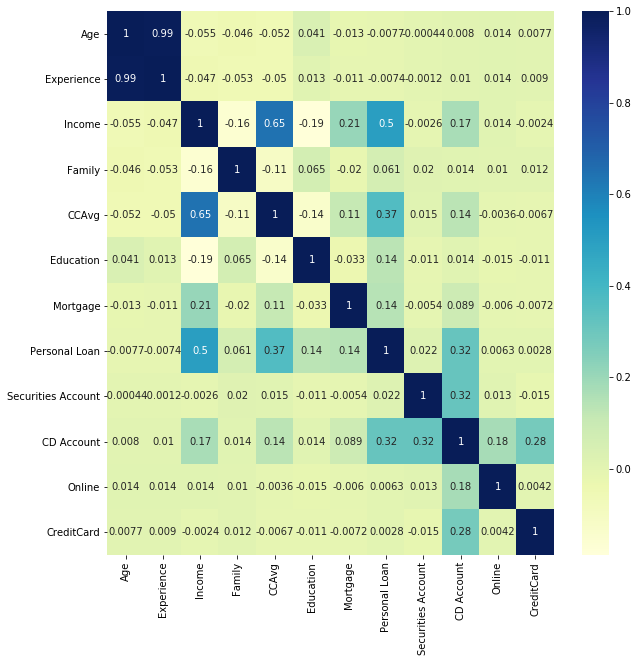

In [13]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(dataset1.corr(),annot=True,ax=ax,cmap='YlGnBu')
plt.show()

# Correlation inferences
The target variable Personal Loan has moderate correlation with Income,CCAvg and CD Account, almost no correlation with other attributes or independent variable.

# Splitting the dataset

In [14]:
y=dataset1.iloc[:,7:8]
y.head()


,Personal Loan
0,0
1,0
2,0
3,0
4,0


In [15]:
x=dataset1.drop(["Personal Loan"],axis=1)
x.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,1,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1


## Logistic regression and performance metrics

In [17]:
import statsmodels.api as sm

In [18]:
x1=sm.add_constant(x)
logistic=sm.Logit(y,x1)
result=logistic.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.128435
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4988
Method:                           MLE   Df Model:                           11
Date:                Sun, 09 Aug 2020   Pseudo R-squ.:                  0.5938
Time:                        11:51:00   Log-Likelihood:                -642.18
converged:                       True   LL-Null:                       -1581.0
                                        LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -12.1928      1.645     -7.411      0.000     -15.417      -8.968
Age                   -0.0536      0.061     -0.874      0.382      -0.174       0.067
Experience             0.0638      0.061      1.046      0.295      -0.056       0.183
Income                 0.0546      0.003     20.831      0.000       0.049       0.060
Family                 0.6958      0.074      9.364      0.000       0.550       0.841
CCAvg                  0.1240      0.040      3.127      0.002       0.046       0.202
Education              1.7362      0.115     15.088      0.000       1.511       1.962
Mortgage               0.0005      0.001      0.856      0.392      -0.001       0.002
Securities Account    -0.9368      0.286     -3.277      0.001      -1.497      -0.377
CD Account             3.8225      0.324     11.800      0.000       3.188       4.457
Online                -0.6752      0.157     -4.298      0.000      -0.983      -0.367
CreditCard            -1.1197      0.205     -5.462      0.000      -1.522      -0.718
======================================================================================
"""


# Inferences
1) All the independent variables have p-value less than 0.05 suggesting that all the variables play a significant role in deciding the sanctioning of Personal Loan.

2) Out of all these variables, namely Income,Family,Education,CD Account,Online,Securities Account and Credit Card are most significant.

3) The regression equation to be used in sigmoid fucntion can be written as-

Personal Loan= [-12.19 + (-0.054)Age + (0.064)Experience + (0.0548)Income + (0.69)Family + (0.12)CCAvg + (1.73)Education + (0.0005)Mortgage + (-0.94)Securities Account + (3.82)CD Account + (-0.67)Online + (-1.12)CreditCard]